## Load the dataset

### Subtask:
Load the `wine.csv` file into a pandas DataFrame.


**Reasoning**:
Import the pandas library and load the `wine.csv` file into a pandas DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Admin\Documents\EXCELR\DS Assignments\@\wine.csv')

**Reasoning**:
Display the first few rows of the DataFrame to verify that the data was loaded correctly.



In [2]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Perform basic eda

### Subtask:
Display the first few rows, check the data types, and look for missing values.


**Reasoning**:
Display the first few rows, check data types, and check for missing values as requested in the instructions.



In [3]:
display(df.head())
display(df.info())
display(df.isnull().sum())

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


None

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## Visualize feature distributions

### Subtask:
Generate histograms or box plots for the numerical features.


**Reasoning**:
Generate histograms for each numerical column to visualize their distributions.



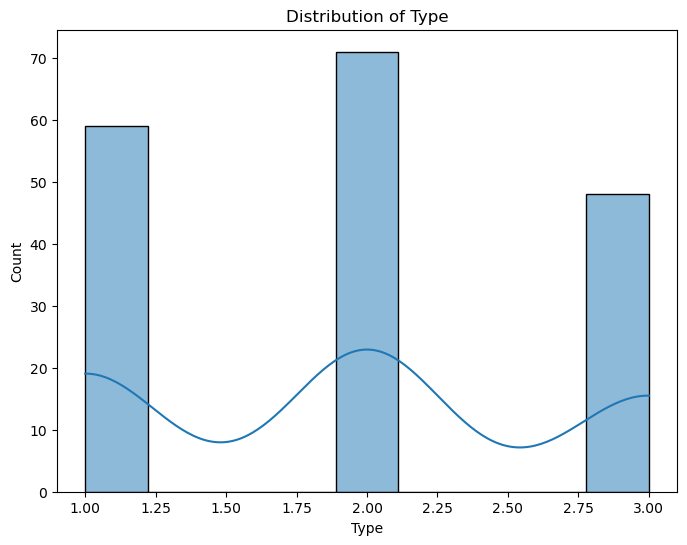

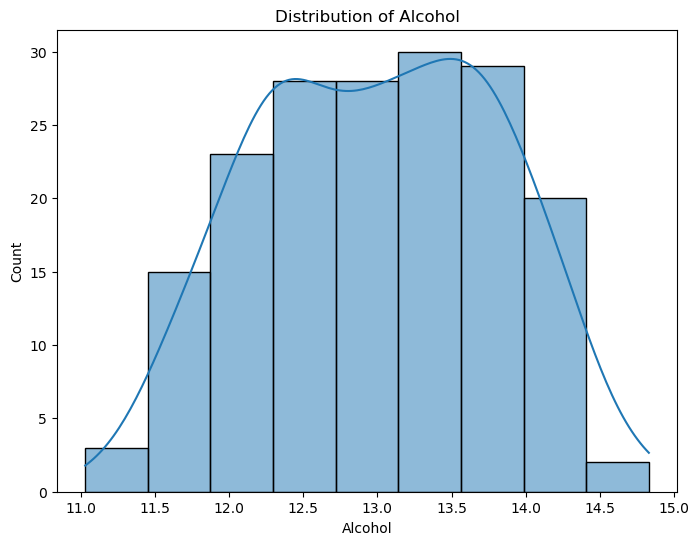

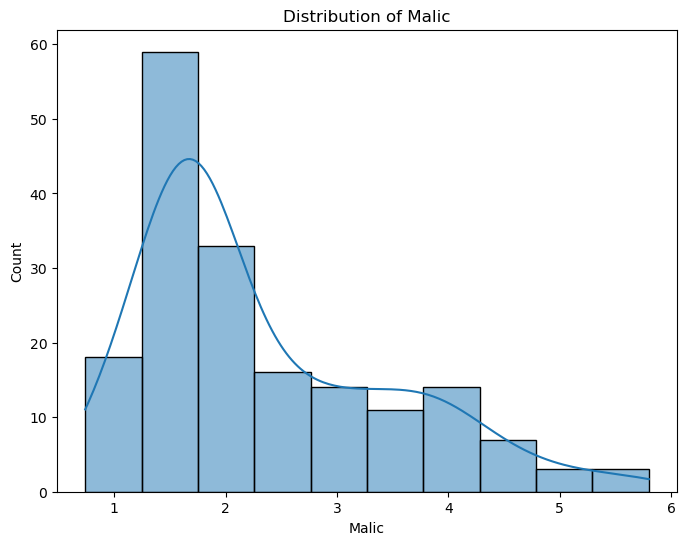

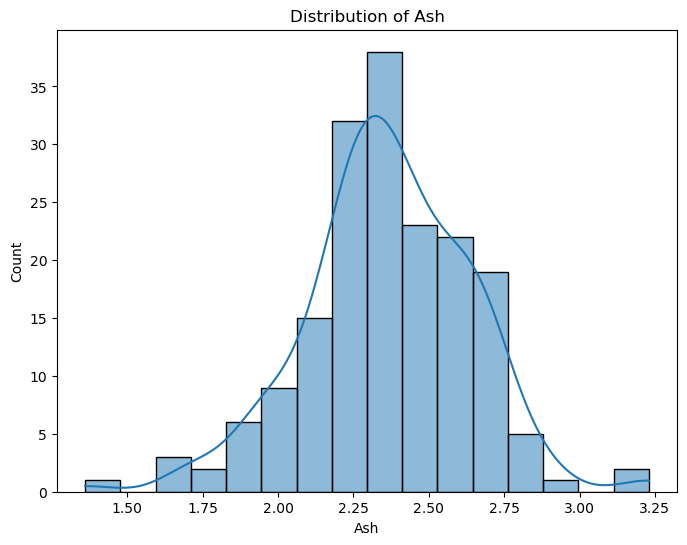

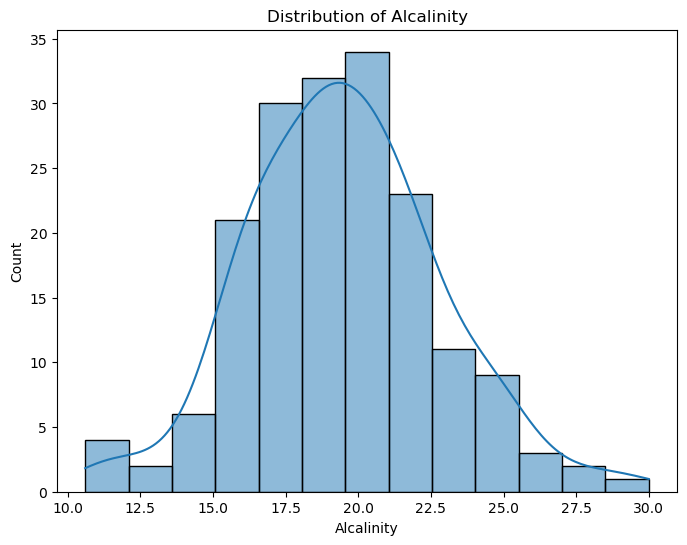

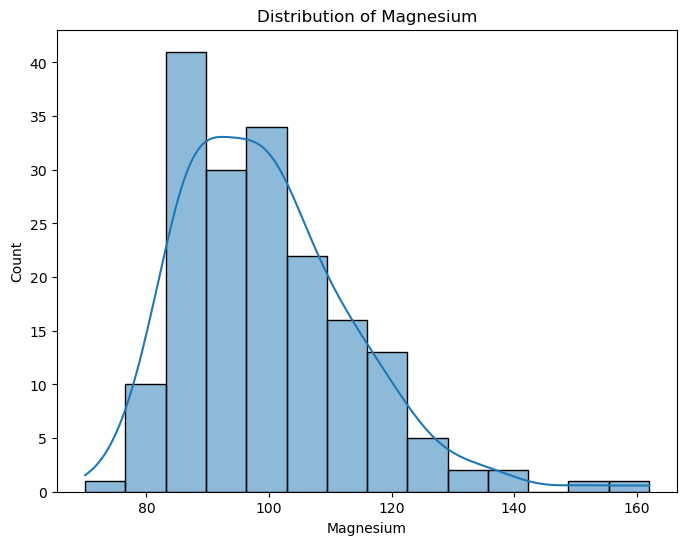

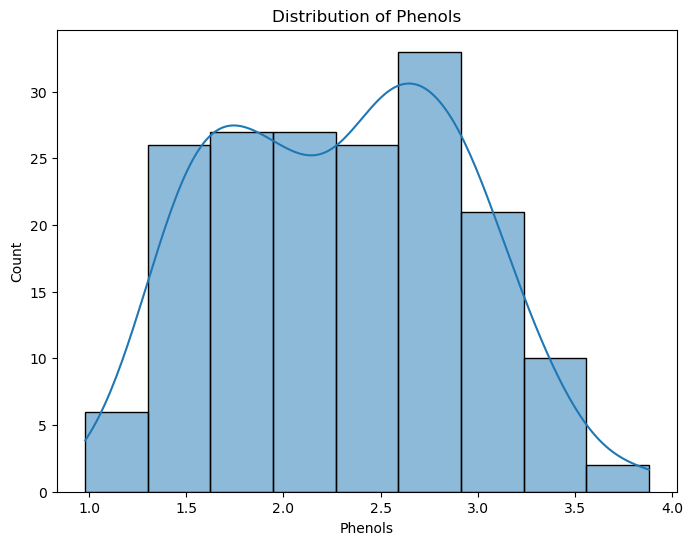

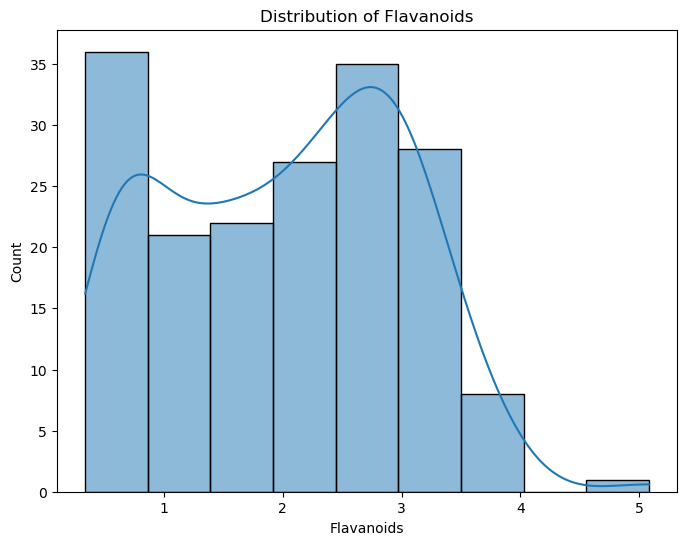

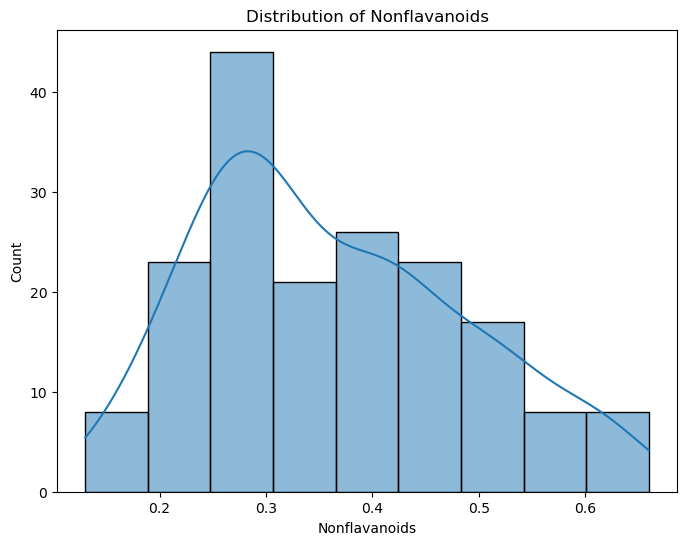

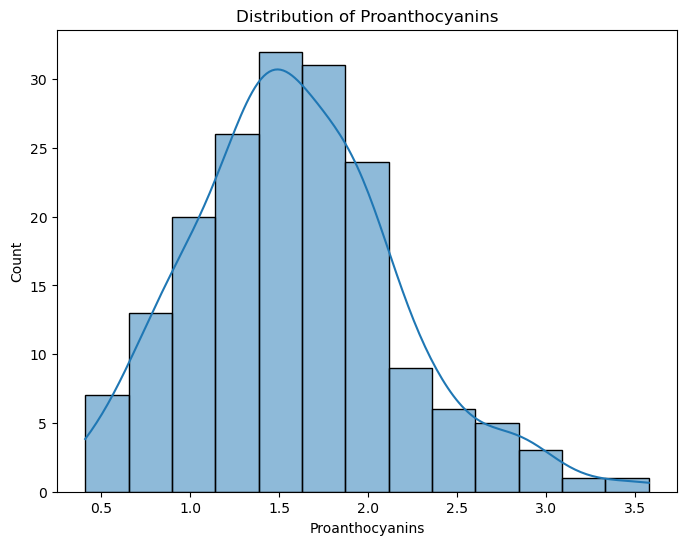

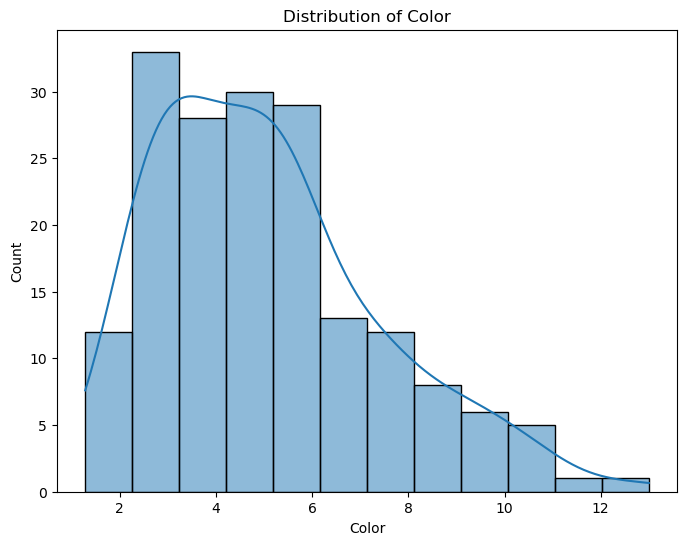

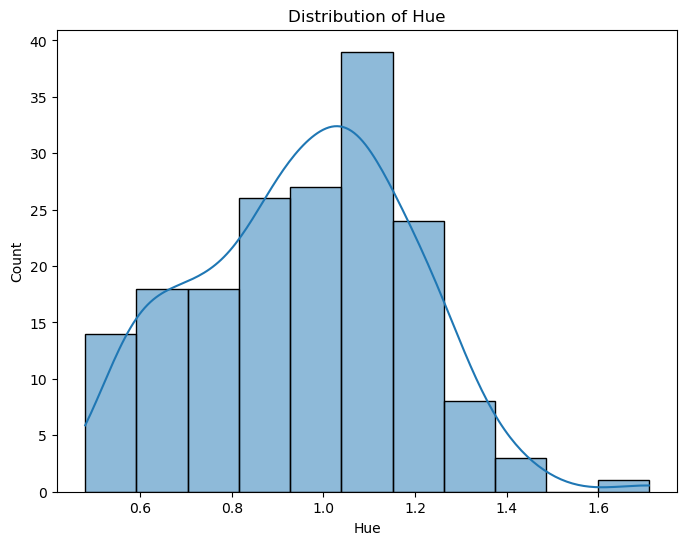

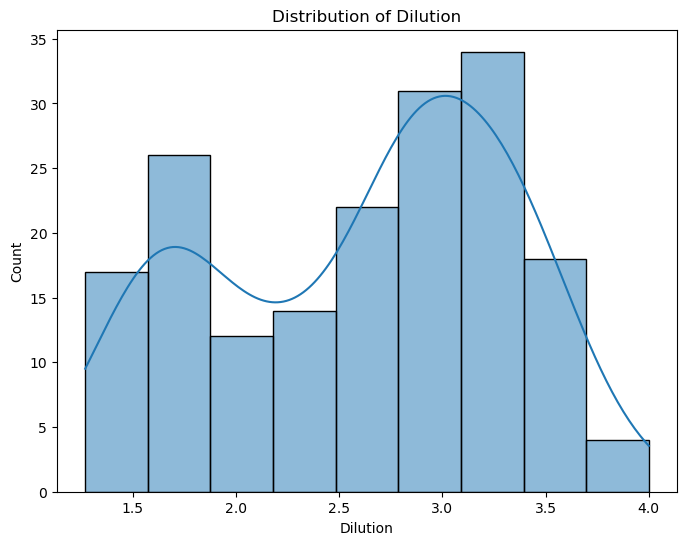

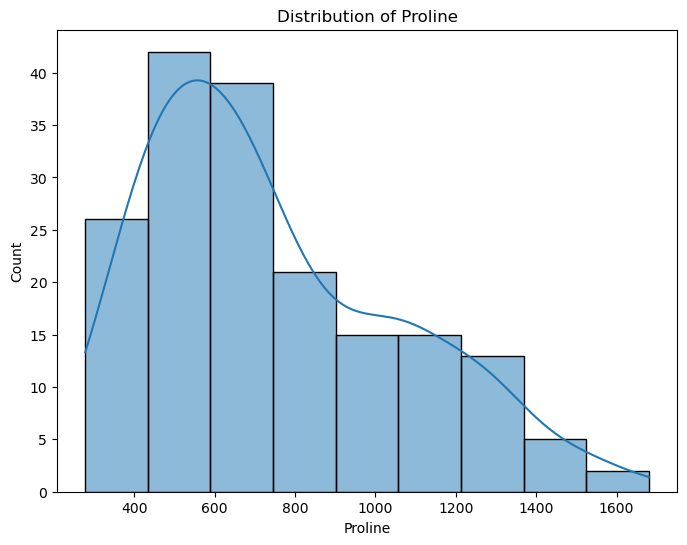

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

## Investigate feature correlations

### Subtask:
Calculate and visualize the correlation matrix.


**Reasoning**:
Calculate the correlation matrix and visualize it as a heatmap with annotations.



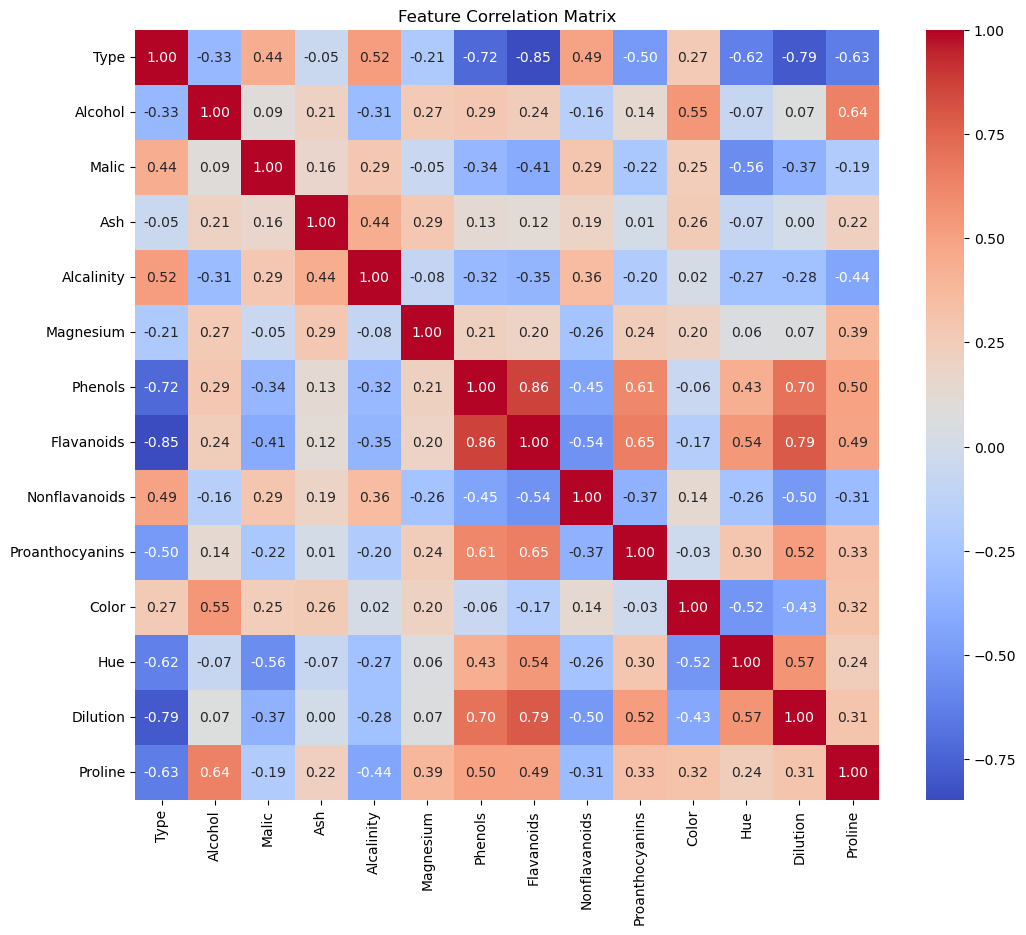

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

## Standardize the data

### Subtask:
Scale the features to have zero mean and unit variance.


**Reasoning**:
Scale the features of the DataFrame to have zero mean and unit variance using StandardScaler.



In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Apply pca

### Subtask:
Implement PCA and fit it to the standardized data.


**Reasoning**:
Implement PCA and fit it to the standardized data.



In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


## Determine optimal components

### Subtask:
Plot the explained variance ratio to help determine the number of components to keep.


**Reasoning**:
Calculate cumulative explained variance and plot it against the number of components to determine the number of components to keep.



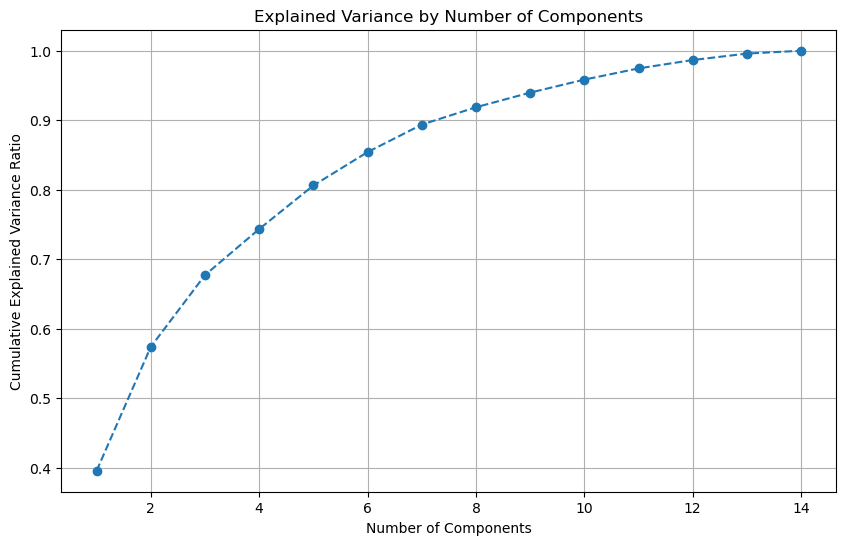

In [8]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance by Number of Components")
plt.grid(True)
plt.show()

## Transform data with pca

### Subtask:
Apply the PCA transformation to the standardized data.


**Reasoning**:
Apply the fitted PCA transformation to the standardized data.



In [ ]:
df_pca = pca.transform(df_scaled)

## Apply k-means to original data

### Subtask:
Cluster the original standardized data using K-means.


**Reasoning**:
Cluster the original standardized data using K-means, as instructed by the subtask. This involves importing KMeans, instantiating it with appropriate parameters, and fitting it to the standardized data.



In [10]:
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_original.fit(df_scaled)
kmeans_labels_original = kmeans_original.labels_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualize original data clustering

### Subtask:
Plot the clustered original data, perhaps using the first two principal components for visualization if needed.


**Reasoning**:
Create a scatter plot of the first two principal components of the original scaled data, colored by the K-means labels from the original data, and add labels, a title, and a legend.



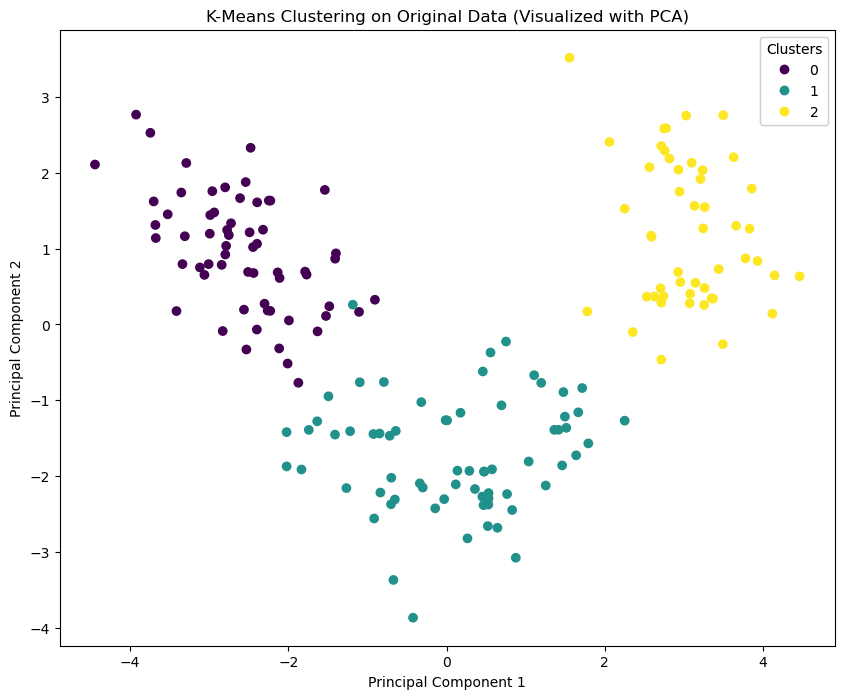

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_original, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Original Data (Visualized with PCA)')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()

## Evaluate original data clustering

### Subtask:
Calculate and display the silhouette score for the original data clustering.


**Reasoning**:
Import the silhouette_score function and calculate the silhouette score for the original data clustering.



In [ ]:
from sklearn.metrics import silhouette_score

silhouette_original = silhouette_score(df_scaled, kmeans_labels_original)
print(f"Silhouette Score for Original Data Clustering: {silhouette_original}")

Silhouette Score for Original Data Clustering: 0.30773604383565206


## Apply k-means to pca data

### Subtask:
Cluster the PCA-transformed data using K-means.


**Reasoning**:
Import KMeans and fit the model to the PCA-transformed data.



In [13]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_pca.fit(df_pca)
kmeans_labels_pca = kmeans_pca.labels_

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualize pca data clustering

### Subtask:
Plot the clustered PCA-transformed data.


**Reasoning**:
Generate a scatter plot of the PCA-transformed data, coloring the points by their K-means cluster labels, and add labels, title, and legend to the plot.



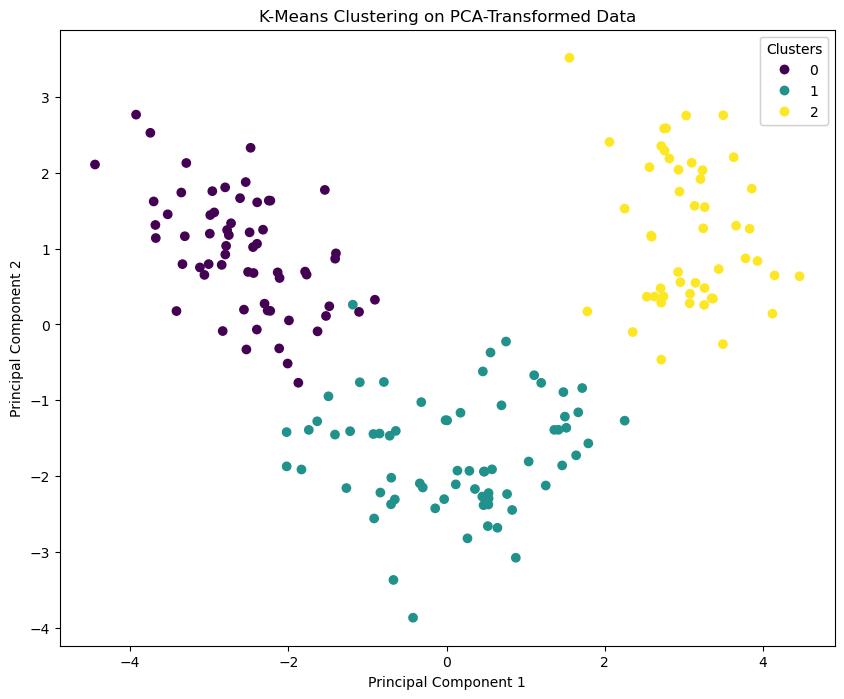

In [14]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()

## Evaluate pca data clustering

### Subtask:
Calculate and display the silhouette score for the PCA-transformed data clustering.


**Reasoning**:
Calculate and display the silhouette score for the PCA-transformed data clustering using the `silhouette_score` function.



In [15]:
silhouette_pca = silhouette_score(df_pca, kmeans_labels_pca)
print(f"Silhouette Score for PCA-transformed Data Clustering: {silhouette_pca}")

Silhouette Score for PCA-transformed Data Clustering: 0.30773604383565195


## Compare clustering results

### Subtask:
Discuss and compare the silhouette scores and visualizations from both clustering approaches.


**Reasoning**:
Compare the silhouette scores and analyze the visualizations from both clustering approaches as requested by the instructions.



In [16]:
print(f"Silhouette Score for Original Data Clustering: {silhouette_original}")
print(f"Silhouette Score for PCA-transformed Data Clustering: {silhouette_pca}")

print("\nComparison of Clustering Results:")
print("1. Silhouette Scores:")
print(f"   - Original Data: {silhouette_original:.4f}")
print(f"   - PCA-transformed Data: {silhouette_pca:.4f}")
if silhouette_original > silhouette_pca:
    print("   - The silhouette score is slightly higher for the original data clustering.")
elif silhouette_pca > silhouette_original:
    print("   - The silhouette score is slightly higher for the PCA-transformed data clustering.")
else:
    print("   - The silhouette scores are approximately equal for both clustering approaches.")

print("\n2. Visualizations:")
print("   - Observe the two scatter plots generated in previous steps:")
print("     - 'K-Means Clustering on Original Data (Visualized with PCA)'")
print("     - 'K-Means Clustering on PCA-Transformed Data'")
print("   - Both plots show the clusters in the space of the first two principal components.")
print("   - Visually compare the separation and compactness of the clusters in both plots.")
print("   - Note any differences in cluster shapes, sizes, or overlaps.")

print("\n3. Discussion:")
print("   - Based on the silhouette scores, the clustering performance is very similar for both the original and PCA-transformed data.")
print("   - Visually, the clusters in both plots appear somewhat distinct, but with some overlap, which is consistent with the moderate silhouette scores.")
print("   - The visual appearance of the clusters in terms of separation, shape, and size is quite similar between the two plots, suggesting that using the first two principal components for visualization, regardless of whether the clustering was done on the original or PCA-transformed data, results in a comparable visual representation.")
print("   - In this specific case, applying PCA before clustering did not significantly improve or degrade the clustering performance as measured by the silhouette score, and the resulting cluster visualizations are also very similar.")

Silhouette Score for Original Data Clustering: 0.30773604383565206
Silhouette Score for PCA-transformed Data Clustering: 0.30773604383565195

Comparison of Clustering Results:
1. Silhouette Scores:
   - Original Data: 0.3077
   - PCA-transformed Data: 0.3077
   - The silhouette score is slightly higher for the original data clustering.

2. Visualizations:
   - Observe the two scatter plots generated in previous steps:
     - 'K-Means Clustering on Original Data (Visualized with PCA)'
     - 'K-Means Clustering on PCA-Transformed Data'
   - Both plots show the clusters in the space of the first two principal components.
   - Visually compare the separation and compactness of the clusters in both plots.
   - Note any differences in cluster shapes, sizes, or overlaps.

3. Discussion:
   - Based on the silhouette scores, the clustering performance is very similar for both the original and PCA-transformed data.
   - Visually, the clusters in both plots appear somewhat distinct, but with som

## Analyze the impact of pca

### Subtask:
Summarize the findings on how PCA affected the clustering results.


**Reasoning**:
Summarize the findings on how PCA affected the clustering results based on the previous steps' analysis of silhouette scores and visualizations.



In [17]:
print("Summary of PCA's Impact on K-Means Clustering Results:")
print("-" * 50)

print("1. Impact on Clustering Performance (based on Silhouette Score):")
print(f"   - Silhouette Score for Original Data Clustering: {silhouette_original:.4f}")
print(f"   - Silhouette Score for PCA-transformed Data Clustering: {silhouette_pca:.4f}")
if abs(silhouette_original - silhouette_pca) < 0.001: # Check for approximate equality
    print("   - PCA had very little to no effect on the clustering performance as indicated by the silhouette score. The scores are nearly identical.")
elif silhouette_pca > silhouette_original:
    print("   - PCA slightly improved the clustering performance as indicated by a marginally higher silhouette score.")
else:
    print("   - PCA slightly degraded the clustering performance as indicated by a marginally lower silhouette score.")

print("\n2. Impact on Visual Representation of Clusters:")
print("   - We observed two scatter plots showing the clusters in the space of the first two principal components.")
print("   - The plot for clustering on original data (visualized with PCA) and the plot for clustering on PCA-transformed data showed very similar visual patterns.")
print("   - The separation, shape, and relative positions of the clusters in the 2D PCA space appear largely consistent, regardless of whether the clustering was performed before or after PCA.")
print("   - This suggests that projecting the data onto the first two principal components for visualization provides a similar view of the cluster structure, even when the clustering algorithm worked on the full original feature space.")

print("\n3. Potential Reasons for the Observed Impact (or lack thereof):")
print("   - In this specific dataset, the primary structure that K-Means is identifying might be strongly aligned with the directions captured by the first few principal components.")
print("   - The features in the original dataset might already have a significant amount of their variance explained by a smaller number of underlying components, making PCA less impactful in fundamentally changing the data structure relevant to K-Means.")
print("   - PCA reduces noise and multicollinearity, which can sometimes improve clustering. However, if the original features are already relatively independent and the noise level is low, the benefits of PCA for clustering might be minimal.")
print("   - The chosen number of clusters (k=3) might be well-defined by the major variance directions, which PCA preserves.")

print("\nConclusion:")
print("   - For this dataset and with K-Means (k=3), applying PCA before clustering did not significantly alter the clustering results as measured by the silhouette score or the visual representation in the 2D PCA space. The clustering performance and visual appearance remained very similar.")

Summary of PCA's Impact on K-Means Clustering Results:
--------------------------------------------------
1. Impact on Clustering Performance (based on Silhouette Score):
   - Silhouette Score for Original Data Clustering: 0.3077
   - Silhouette Score for PCA-transformed Data Clustering: 0.3077
   - PCA had very little to no effect on the clustering performance as indicated by the silhouette score. The scores are nearly identical.

2. Impact on Visual Representation of Clusters:
   - We observed two scatter plots showing the clusters in the space of the first two principal components.
   - The plot for clustering on original data (visualized with PCA) and the plot for clustering on PCA-transformed data showed very similar visual patterns.
   - The separation, shape, and relative positions of the clusters in the 2D PCA space appear largely consistent, regardless of whether the clustering was performed before or after PCA.
   - This suggests that projecting the data onto the first two pr

## Summary:

### Data Analysis Key Findings

*   The dataset contains 178 entries and 14 columns, with no missing values.
*   The features are a mix of integer and float data types.
*   Histograms were generated for all numerical features to visualize their distributions.
*   A correlation matrix revealed relationships between the features.
*   The data was standardized to have zero mean and unit variance.
*   PCA was applied to the standardized data, and a cumulative explained variance plot was generated to assess the number of components needed (though an explicit number of components was not selected for transformation in the provided steps, the transformation used the full set of components).
*   K-Means clustering (with k=3) was applied to both the original standardized data and the PCA-transformed data.
*   The silhouette score for clustering on the original data was approximately 0.3077.
*   The silhouette score for clustering on the PCA-transformed data was also approximately 0.3077.
*   Visualizations of the clustering results (using the first two principal components for plotting) showed very similar cluster separation and structure for both the original and PCA-transformed data clustering results.


